# Modelo de Rozenberg 2.0

### Comienzo del programa
***
Se importan las librerías de las funciones a utilizar:

In [52]:
import numpy as np
import matplotlib.pyplot as plt

### Parametros iniciales del programa
***
Se definen los valores y datos a utilizar para el desarrollo del problema:

* **_n_**   : tamaño total de la muestra (bines)
* **_nc_**  : tamaño de la zona de los contactos
* **_di(i)_**   : densidad de vacancias en el sitio i
* **_rho(i)_**  : resistividad en el sitio i
* **_delta(i)_**: cambio de densidad del sitio i
* **_vb(i)_**: movilidad de cada sitio i
* **_v(i)_** : potencial de cada sitio i
* **_vtotal, i_total_**: potencial y corriente total


<img src="Modelo de Rozemberg 01.jpg">

In [53]:
###Definicion de mis variabales en Python
N= 100                          #Parametro para variar extension de las listas
n = list(range(0,N))            #Listado de tamaño total de la muestra
vb= list(range(0,N))            #Listado - movilidad de cada sitio i
NR= 10                          #Parametro - tamaño del extremo derecho
NL= 10                          #Parametro - tamaño del extremo izquierdo
NB= N-(NR+NL)                   #Parametro - tamaño del nucleo (bulk)
VBA=16                          #Parametros - movilidad en extremos
VBB=14                          #Parametros - movilidad en el nucleo

### Parametros de movilidad de los contactos
***
* Vba y Vbb: parametros de movilidad de los contactos (Vba) y del volumen (Vbb)
* En este caso Vba=/=Vbb
* El perfil de vb(i) puede ser suave o abrupto (si width==0)
* _width_ es el ancho de transicion entre una zona y otra, es  para hacer el cambio de resist. mas suave
      

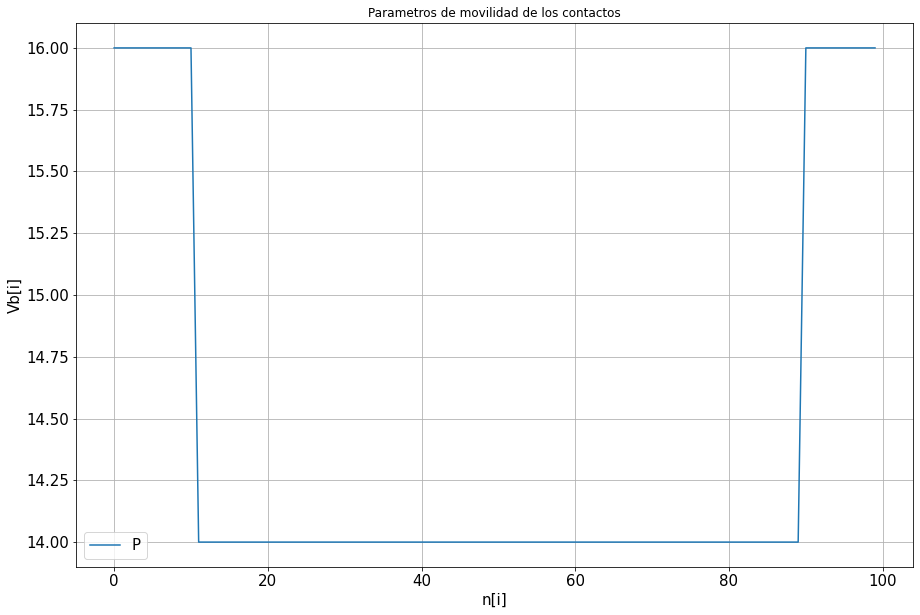

In [54]:
for i in n:
    if i <= NL:
        vb[i]=VBA
    elif i >=len(n)-NR:   #obtengo long de la lista n
        vb[i]=VBA
    else:
        vb[i]=VBB
        
plt.plot(n, vb)
plt.legend('Parametros de movilidad de los contactos')
plt.xlabel('n[i]')
plt.ylabel('Vb[i]')
plt.title('Parametros de movilidad de los contactos')
plt.grid(True)

### Parametros que definen las rampas de potencial
***
0 --> Vmax --> 0 --> -Vmax      en tiempo s

* **_Vmax_**               : Voltaje maximo
* **_V0 =_** _Vmax*0.016_    : constante adimensional  
* **_s_**                  : tiempo que dura cada ciclo
* **_n_ciclos_**           : numero de ciclos totales
* **_tau= n_ciclos * s_**  : tiempo total del experimento

En cada paso temporal de la simulacion t (1<= t <=tau) se aplica un voltaje externo V(t)  

La corriente del sistema es I(t)= V(t)/rhotot

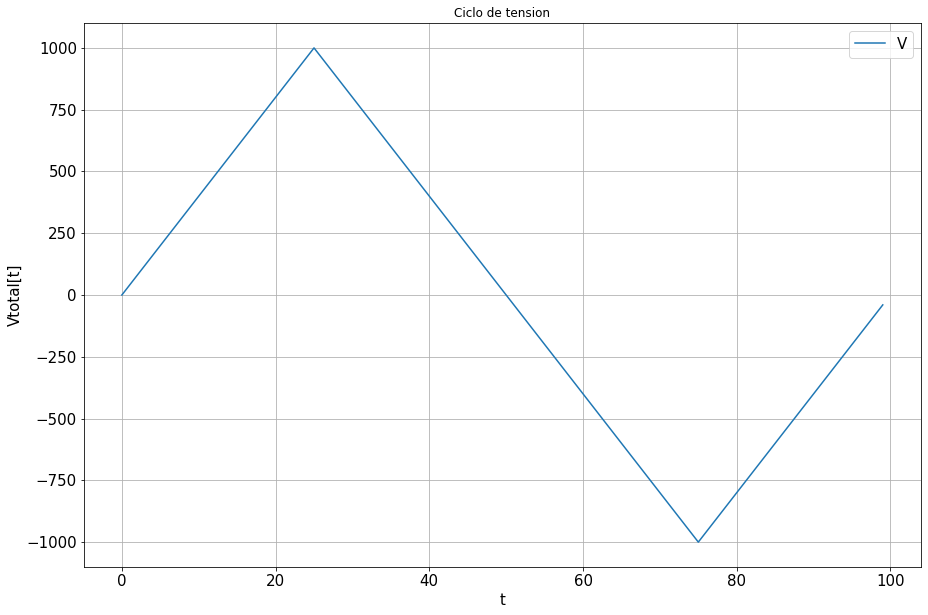

In [55]:
#Pulsos de tension
Vmax=1000                #Seteado asi en Rozenberg
s=100                    #Cantidad de time steps t que componen un ciclo
n_ciclos= 1              #Cantidad de ciclos que componen la secuencia
tau= n_ciclos*s          #Tiempo total de la secuencia
k=Vmax/(s/4)

t_ciclo= list(range(0,s))
V_total = list(range(0,s))

V0=Vmax*0.016            #Seteado asi en Rozemberg

for t in t_ciclo:
    if (0 <= t <s/4):
        V_total[t]= k*t
    if (s/4 <= t <=s*3/4):
        V_total[t]= 2*Vmax-k*t
    if (s*3/4 < t <=s):
        V_total[t]= -4*Vmax+k*t
        
plt.plot(t_ciclo, V_total, label='Ciclo de tension')
plt.legend('V_total')
plt.xlabel('t')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension')
plt.grid(True)

### Densidad de vacancias inicial y total
***
* La densidad de vacancias iniciales se setean en 10E-4
* La densidad de vacancias total sera la sumatoria de todas las vacancias locales

In [56]:
#Densidad de vacancias inicial --> 10E-4 Rozemberg
di= list(range(0,N)) 
for i in n:
    di[i]=10E-4

#Densidad de vacancias total
dtot=0
for i in n:
    dtot+=di[i]

### Resistividades locales
***
Se determinan los parametros para calcular la resistividad local y posteriormente total  
*Fact* son constantes en cada sector de la muestra  
La resistividad de cada sitio se define como:  
                *R(i) = A(i) * di(i)*

In [57]:
rho= list(range(0,N))
AL = 1000           #Valores seteados asi en Rozemberg et all
AR = 1000
AB = 1

rho_total= list(range(0,tau))    ##Resistencia total
rho_izq  = list(range(0,tau))    ##Resistencia izquierda
rho_der  = list(range(0,tau))    ##Resistencia derecha

### Definicion de otras variables
***


In [58]:
i_total = list(range(0,tau))
vi      = list(range(0,N))
delta_vi= list(range(0,N))
pi      = list(range(0,N))
delta_di= list(range(0,N))


pi_i_r= list(range(0,N))
pi_i_l= list(range(0,N))
pi_r_i= list(range(0,N))
pi_l_i= list(range(0,N))
delta_l= list(range(0,N))
delta_r= list(range(0,N))
delta= list(range(0,N))

### Cuerpo del codigo
***

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:32: RuntimeWarning: overflow encountered in exp
  pi_r_i[i]= di[i+1]*(1-di[i])   * np.exp(-vb[i+1]+vi[i]-vi[i+1])
C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:33: RuntimeWarning: overflow encountered in exp
  pi_l_i[i]= di[i-1]*(1-di[i])   * np.exp(-vb[i-1]+vi[i]-vi[i-1])
C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:30: RuntimeWarning: overflow encountered in exp
  pi_i_r[i]= di[i]  *(1-di[i+1]) * np.exp(-vb[i]  +vi[i+1]-vi[i])
C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:31: RuntimeWarning: overflow encountered in exp
  pi_i_l[i]= di[i]  *(1-di[i-1]) * np.exp(-vb[i]  +vi[i-1]-vi[i])
C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:30: RuntimeWarning: overflow encountered in double_scalars
  pi_i_r[i]= di[i]  *(1-di[i+1]) * np.exp(-vb[i]  +vi[i+1]-vi[i])
C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16228/3519838929.py:32: RuntimeWarnin

[-382955681358.2476, -710039409718.8898, 473475135716.7492, 435655206115.839, 201714179638.09503, -379370115678.9851, 106633211363.76495, -285275259756.8604, -482578243815.28, -142211335801.71494, 19546743288.622177, 748323282180.5254, -177457121933.8365, 1339909246131.4592, 1505787455952.9624, -587327648737.5134, -31543578175.770885, -941811310687.0612, -1163009237222.0728, 717785327232.7931, -220604263260.07404, -560939231014.2521, 3973129102617.764, 3787894655738.3223, 2609696614772.4966, 3154096214048.658, 4412578693392.84, 1752935000764.705, -136761506080.72809, -2032065243625.1382, 2903306809259.91, -6428434605557.018, -6668650597417.14, 14982817915631.84, 3689331969261.2715, -6156276439112.319, -536603747724.39166, 392553525636.7109, -5019880040590.658, -5124818236115.97, 10731989092465.71, 6907073678776.274, 14024356702545.205, 18905775872402.535, 21914149016041.082, 39377872134966.28, 31132344176296.707, 25910193350116.395, 1917787899764.5386, 18887331222854.27, 6811926212520.

Text(0.5, 1.0, 'Resistive Hysteresis Loop')

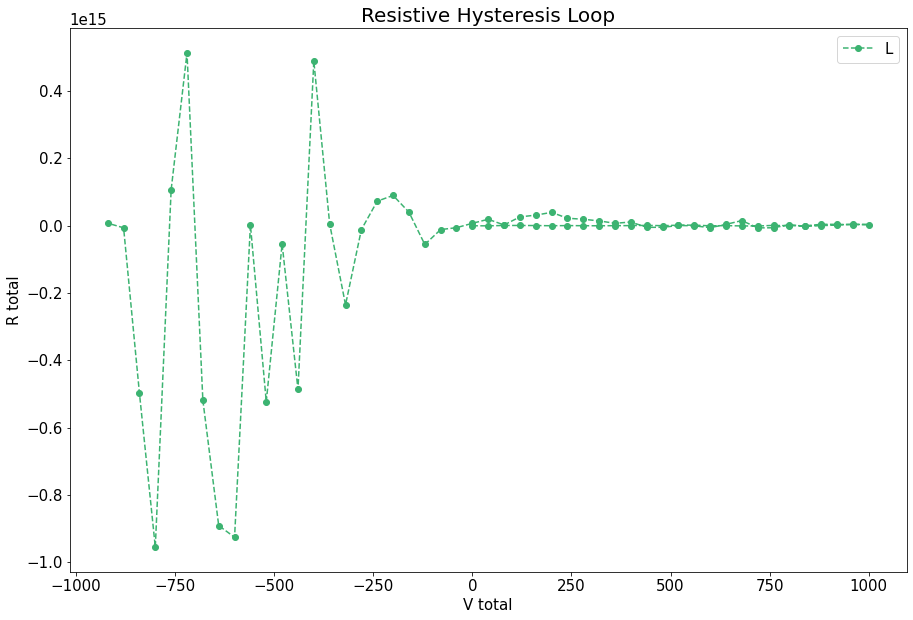

In [61]:
for t in t_ciclo:
    #Calculamos resistencias locales
    for i in n:
        if i <= NL:
            rho[i]=AL*di[i]
        elif i >=len(n)-NR:
            rho[i]=AR*di[i]
        else:
            rho[i]=AB*di[i]
    #Resistencias totales
    for i in n:
        rho_total[t]= rho_total[t]  + rho[i]
        if i <= NL:
            rho_izq[t] = rho_izq[t] + rho[i]
        if i>=len(n)-NR:
            rho_der[t] = rho_der[t] + rho[i]

    #Corriente total
    i_total[t]= V_total[t]/rho_total[t] 

    #Calculamos los valores en el tiempo [t]
    for i in n:
        if i == 99:
            break
        vi[i]=i_total[t]*rho[i]      #potenciales locales
        
        delta_vi[i]= vi[i+1]-vi[i]   #diferencia de potencial local
        
        #probabilidad de transferencia de vacancias
        pi_i_r[i]= di[i]  *(1-di[i+1]) * np.exp(-vb[i]  +vi[i+1]-vi[i]) 
        pi_i_l[i]= di[i]  *(1-di[i-1]) * np.exp(-vb[i]  +vi[i-1]-vi[i])
        pi_r_i[i]= di[i+1]*(1-di[i])   * np.exp(-vb[i+1]+vi[i]-vi[i+1])
        pi_l_i[i]= di[i-1]*(1-di[i])   * np.exp(-vb[i-1]+vi[i]-vi[i-1])
    
        pi_i_r[N-1]= 0
        pi_i_l[0]= 0
        pi_r_i[0]= 0
        pi_l_i[N-1]= 0
        
        #Se calcula la variacion en densidad en cada sitio
        #  delta(i)= pi_r_i[i]+pi_l_i[i] - (pi_i_l[i]+pi_i_r[i])
        #Se tienen en cuenta los limites de migracion: 0 y 1


        delta_l[i] = pi_i_l[i]-pi_l_i[i]
        delta_r[i] = pi_i_r[i]-pi_r_i[i]
        
        if (delta_l[i]>0):
            delta_l[i]= min(delta_l[i],di[i],1-di[i+1])
        else:
            delta_l[i]=-min(-delta_l[i],di[i+1],1-di[i])
            
        if (delta_r[i]>0):
            delta_r[i]= min(delta_r[i],di[i],1-di[i-1])
        else:
            delta_r[i]=-min(-delta_r[i],di[i-1],1-di[i])
                 
        delta[i]=delta_r[i]+delta_l[i]
    
    ##Se actualiza la densidad local de vacancias, di(i)
    for i in n:
        di[i]=di[i]-delta[i]
        
print(rho_total)
print(V_total)

plt.rc('figure', figsize=(15, 10))
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.plot(V_total, rho_total, 'o', linestyle='dashed', label='Loop #1', color='mediumseagreen')
#plt.plot(turnos, acumulatedImmuneEnergyList, 'o', linestyle='dashed', label='Energía', color='mediumseagreen')
plt.legend('Loop #1')
plt.xlabel('V total')
plt.ylabel('R total')
plt.title('Resistive Hysteresis Loop', fontsize=20)


In [60]:
#plt.plot(turnos, acumulatedImmuneEnergyList, 'o', linestyle='dashed', label='Energía', color='mediumseagreen')
#plt.plot(turnos, variationImmuneEnergy, 'o', linestyle='dashed', label='Variación energía', color='seagreen')
